In [1]:
#Tarea4
import pandas as pd
import numpy as np

df4 = pd.read_excel("datosfinalesapartamentos.xlsx")  


print(df4.info())
print(df4.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8939 entries, 0 to 8938
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8939 non-null   int64  
 1   category            8939 non-null   object 
 2   title               8939 non-null   object 
 3   body                8939 non-null   object 
 4   amenities           6001 non-null   object 
 5   bathrooms           8939 non-null   float64
 6   bedrooms            8939 non-null   int64  
 7   currency            8939 non-null   object 
 8   fee                 8939 non-null   object 
 9   has_photo           8939 non-null   object 
 10  pets_allowed        8939 non-null   object 
 11  price               8939 non-null   int64  
 12  price_display       8939 non-null   object 
 13  price_type          8939 non-null   object 
 14  square_feet         8939 non-null   int64  
 15  address             5803 non-null   object 
 16  cityna

In [2]:

#Division datos prueba 
from sklearn.model_selection import train_test_split

y = df4["price"]  # La columna 'price' es nuestra salida

# Variables predictoras (las usamos para predecir)
X = df4[["square_feet"]]  # Solo usamos 'square_feet' por ahora

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [3]:
#Regresion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(model_lr.intercept_)
print(model_lr.coef_)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))




842.5872365408461
[0.53547505]
MAE: 361.8411129758515
MSE: 210989.2617431468
R² Score: 0.10324826826611178


In [4]:
#Otro modelo
#Division datos prueba 
from sklearn.model_selection import train_test_split

y = df4["price"]  # La columna 'price' es nuestra salida

# Variables predictoras (las usamos para predecir)
X = df4[["square_feet", "bedrooms", "bathrooms"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(model_lr.intercept_)
print(model_lr.coef_)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


803.0182631538107
[  0.42452999 -17.04715817 124.72678299]
MAE: 361.34347448114255
MSE: 209576.30270685809
R² Score: 0.10925366139461834


In [5]:
# Crear nuevas columnas indicando si se permiten gatos o perros
df4["pets_allowed_Cats"] = df4["pets_allowed"].apply(lambda x: 1 if "Cats" in x else 0)
df4["pets_allowed_Dogs"] = df4["pets_allowed"].apply(lambda x: 1 if "Dogs" in x else 0)

# Verificar la transformación
print(df4[["pets_allowed", "pets_allowed_Cats", "pets_allowed_Dogs"]].head())


  pets_allowed  pets_allowed_Cats  pets_allowed_Dogs
0    Cats,Dogs                  1                  1
1    Cats,Dogs                  1                  1
2    Cats,Dogs                  1                  1
3    Cats,Dogs                  1                  1
4    Cats,Dogs                  1                  1


In [6]:
print(df4.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        1.0   
1  This unit is located at 814 Schutte Road, Evan...       NaN        1.0   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [7]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Definir X (variables predictoras) e y (variable objetivo)
X = df4[["pets_allowed_Cats", "pets_allowed_Dogs"]]  # Variables separadas
y = df4["price"]  # Precio de renta

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Agregar constante para la regresión
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ajustar el modelo de regresión
model = sm.OLS(y_train, X_train_sm).fit()

# Ver los resultados del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.709
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           6.15e-05
Time:                        20:14:56   Log-Likelihood:                -54394.
No. Observations:                7151   AIC:                         1.088e+05
Df Residuals:                    7148   BIC:                         1.088e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1505.5001     71.11

In [ ]:
#Se agregan mas variables al modelo
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

variables_numericas = ["square_feet", "bathrooms", "bedrooms"]
amenidades = ["AC", "Alarm", "Basketball", "Cable or Satellite", "Clubhouse", "Dishwasher",
              "Doorman", "Elevator", "Fireplace", "Garbage Disposal", "Gated", "Golf", "Gym",
              "Hot Tub", "Internet Access", "Luxury", "Parking", "Patio/Deck", "Playground",
              "Pool", "Refrigerator", "Storage", "TV", "Tennis", "View", "Washer Dryer", "Wood Floors"]



X = df4[variables_numericas + ["pets_allowed_Cats", "pets_allowed_Dogs"] + amenidades]
y = df4["price"]



# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Agregar constante para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ajustar el modelo de regresión con todas las variables
model = sm.OLS(y_train, X_train_sm).fit()

# Ver los resultados del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     47.14
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          5.29e-268
Time:                        20:15:01   Log-Likelihood:                -53716.
No. Observations:                7151   AIC:                         1.075e+05
Df Residuals:                    7118   BIC:                         1.077e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                937.1496     67

In [13]:
# Contar cuántas veces aparece cada ciudad
top_cities = df4["cityname"].value_counts().head(10).index  # Mantener solo las 10 ciudades más comunes

# Crear una nueva columna donde solo aparecen las ciudades más frecuentes
df4["cityname_grouped"] = df4["cityname"].apply(lambda x: x if x in top_cities else "Other")

# Aplicar One-Hot Encoding solo a estas 11 categorías (10 ciudades + "Other")
df4 = pd.get_dummies(df4, columns=["cityname_grouped"], drop_first=True)

In [14]:
print(df4.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        1.0   
1  This unit is located at 814 Schutte Road, Evan...       NaN        1.0   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [15]:
# Convertir las columnas a enteros (de True/False a 0/1)
for col in df4.columns:
    if "cityname_grouped_" in col:  # Solo convierte las columnas de ciudades
        df4[col] = df4[col].astype(int)

print(df4.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        1.0   
1  This unit is located at 814 Schutte Road, Evan...       NaN        1.0   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [16]:
variables_numericas = ["square_feet", "bathrooms", "bedrooms"]
variables_categoricas = [col for col in df4.columns if "cityname_grouped_" in col]
amenidades = ["AC", "Alarm", "Basketball", "Cable or Satellite", "Clubhouse", "Dishwasher",
              "Doorman", "Elevator", "Fireplace", "Garbage Disposal", "Gated", "Golf", "Gym",
              "Hot Tub", "Internet Access", "Luxury", "Parking", "Patio/Deck", "Playground",
              "Pool", "Refrigerator", "Storage", "TV", "Tennis", "View", "Washer Dryer", "Wood Floors"]

X = df4[variables_numericas + ["pets_allowed_Cats", "pets_allowed_Dogs"] + variables_categoricas + amenidades]
y = df4["price"]



# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Agregar constante para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ajustar el modelo de regresión con todas las variables
model = sm.OLS(y_train, X_train_sm).fit()

# Ver los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     50.49
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:18:41   Log-Likelihood:                -53470.
No. Observations:                7151   AIC:                         1.070e+05
Df Residuals:                    7108   BIC:                         1.073e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [17]:
# Aplicar One-Hot Encoding a state
df4 = pd.get_dummies(df4, columns=["state"], drop_first=True)

# Convertir las columnas a 0/1 
for col in df4.columns:
    if "state_" in col:  # Solo convierte las columnas de estados
        df4[col] = df4[col].astype(int)

# Verificar la transformación
print(df4.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        1.0   
1  This unit is located at 814 Schutte Road, Evan...       NaN        1.0   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [18]:
variables_estados = [col for col in df4.columns if "state_" in col]
variables_numericas = ["square_feet", "bathrooms", "bedrooms"]
variables_categoricas = [col for col in df4.columns if "cityname_grouped_" in col]
amenidades = ["AC", "Alarm", "Basketball", "Cable or Satellite", "Clubhouse", "Dishwasher",
              "Doorman", "Elevator", "Fireplace", "Garbage Disposal", "Gated", "Golf", "Gym",
              "Hot Tub", "Internet Access", "Luxury", "Parking", "Patio/Deck", "Playground",
              "Pool", "Refrigerator", "Storage", "TV", "Tennis", "View", "Washer Dryer", "Wood Floors"]

X = df4[variables_numericas + ["pets_allowed_Cats", "pets_allowed_Dogs"] + variables_categoricas + amenidades+variables_estados]
y = df4["price"]



# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Agregar constante para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ajustar el modelo de regresión con todas las variables
model = sm.OLS(y_train, X_train_sm).fit()

# Ver los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     110.1
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:19:44   Log-Likelihood:                -51244.
No. Observations:                7151   AIC:                         1.027e+05
Df Residuals:                    7059   BIC:                         1.033e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE, MSE y RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE

# Mostrar resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 361.34347448114255
MSE: 209576.30270685809
RMSE: 457.79504443239455


In [21]:
df4 = pd.read_excel("datosfinalesapartamentos.xlsx")  

In [22]:
#Se crea el archivo con todas las variables transformadas a numericas
# Convertir 'state' en variables dummies numéricas
state_dummies = pd.get_dummies(df4["state"], prefix="state").astype(int)

# Convertir 'has_photo' a valores binarios 
df4["has_photo"] = df4["has_photo"].apply(lambda x: 1 if x == "Yes" else 0)
# Convertir 'source' 
source_dummies = pd.get_dummies(df4["source"], prefix="source").astype(int)

# Unir las nuevas variables al DataFrame original
df4 = pd.concat([df4, source_dummies], axis=1)

# Eliminar la columna original de 'source'
df4 = df4.drop(columns=["source"])

top_cities = df4["cityname"].value_counts().head(10).index

# Crear una nueva columna donde agrupamos las ciudades menos comunes como 'Other'
df4["cityname_grouped"] = df4["cityname"].apply(lambda x: x if x in top_cities else "Other")


# Convertir 'cityname' en variables dummies numéricas
cityname_dummies = pd.get_dummies(df4["cityname"], prefix="cityname").astype(int)
# Unir las dummies al DataFrame original
df4 = pd.concat([df4, state_dummies, cityname_dummies], axis=1)

df4["pets_allowed_Cats"] = df4["pets_allowed"].apply(lambda x: 1 if "Cats" in x else 0)
df4["pets_allowed_Dogs"] = df4["pets_allowed"].apply(lambda x: 1 if "Dogs" in x else 0)
# Eliminar las columnas originales de 'state' y 'cityname'
df4 = df4.drop(columns=["state", "cityname"])


In [23]:
print(df4.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        1.0   
1  This unit is located at 814 Schutte Road, Evan...       NaN        1.0   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [24]:
#PAra guradar en caso de ser necesario
import pandas as pd

# Guardar en Excel
df4.to_excel("datos_completos2.xlsx", index=False, engine="openpyxl")

print("Archivo 'datos_completos2.xlsx' guardado correctamente.")


Archivo 'datos_completos2.xlsx' guardado correctamente.


In [25]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Definir variables predictoras
variables_numericas = ["square_feet", "bathrooms", "bedrooms", "has_photo"]
categorias = list(cityname_dummies.columns) + list(state_dummies.columns)  # Ciudades y estados

X = df4[variables_numericas + ["pets_allowed_Cats", "pets_allowed_Dogs"] + categorias + list(source_dummies.columns)]
y = df4["price"]

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Agregar constante para el intercepto en el modelo de regresión
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [26]:
# Ajustar el modelo de regresión
model = sm.OLS(y_train, X_train_sm).fit()

# Mostrar los resultados del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     14.01
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                -49179.
No. Observations:                7151   AIC:                         1.011e+05
Df Residuals:                    5783   BIC:                         1.105e+05
Df Model:                        1367                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_sm)

# Calcular métricas 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 216.33370210403118
MSE: 85790.27285369813
RMSE: 292.8997658819449
R² Score: 0.6353720795462452


Regresion Lasso

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo Lasso (con regularización L1)
model_lasso = Lasso(alpha=0.1)  # Puedes ajustar alpha para ver cómo cambia el modelo

# Entrenar el modelo con los datos de entrenamiento
model_lasso.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred_lasso = model_lasso.predict(X_test)

# Calcular métricas de evaluación
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Mostrar métricas
print(" MAE:", mae_lasso)
print(" MSE:", mse_lasso)
print(" RMSE:", rmse_lasso)
print(" R² Score:", r2_lasso)

 MAE: 217.8064365765753
 MSE: 84192.15454601345
 RMSE: 290.15884364605097
 R² Score: 0.6421644411484035


In [29]:
import pandas as pd

# Obtener coeficientes de Lasso
coeficientes_lasso = pd.Series(model_lasso.coef_, index=X.columns)

# Mostrar las variables eliminadas (coeficiente = 0)
print(" Variables eliminadas por Lasso:")
print(coeficientes_lasso[coeficientes_lasso == 0])

# Mostrar las variables más importantes según Lasso
print("\n Variables más importantes según Lasso:")
print(coeficientes_lasso[coeficientes_lasso != 0].sort_values(ascending=False).head(1000))

 Variables eliminadas por Lasso:
cityname_Aberdeen          -0.0
cityname_Abilene           -0.0
cityname_Abingdon          -0.0
cityname_Abington          -0.0
cityname_Acworth           -0.0
                           ... 
source_RENTCafé            -0.0
source_RENTOCULAR          -0.0
source_Real Estate Agent   -0.0
source_rentbits            -0.0
source_tenantcloud         -0.0
Length: 1094, dtype: float64

 Variables más importantes según Lasso:
state_DC               903.081247
state_CA               862.656417
state_MA               861.617548
state_HI               852.868990
cityname_Detroit       768.308589
                          ...    
cityname_Absecon      -444.798023
cityname_Blacksburg   -474.535405
cityname_Spokane      -484.952913
cityname_Fall River   -568.029121
cityname_Clementon    -585.688716
Length: 416, dtype: float64


Preguntas




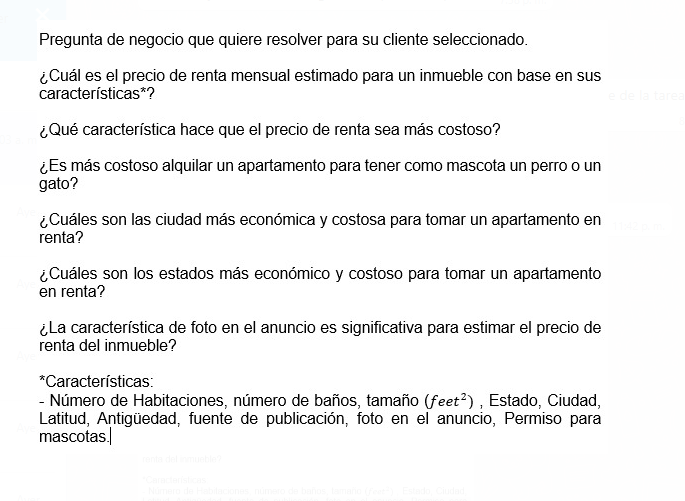

In [ ]:
#Primera pregunta
import numpy as np
import pandas as pd

# Definir un nuevo apartamento con características personalizadas
nuevo_apartamento_dict = {
    "square_feet": 800,
    "bathrooms": 2,
    "bedrooms": 2,
    "has_photo": 1,
    "pets_allowed_Cats": 1,
    "pets_allowed_Dogs": 1,
    "state_CA": 1,
    "state_NY": 0,  
    "cityname_Los Angeles": 1,
    "cityname_New York": 0  
}

# Convertir a DataFrame con las mismas columnas que el modelo
nuevo_apartamento_df = pd.DataFrame([nuevo_apartamento_dict])

# Asegurar que tenga todas las columnas de X_train 
nuevo_apartamento_df = nuevo_apartamento_df.reindex(columns=X_train.columns, fill_value=0)

# Hacer la predicción con el modelo Lasso
predicted_price = model_lasso.predict(nuevo_apartamento_df)

print(f"Precio de renta estimado: ${predicted_price[0]:.2f} al mes")




Precio de renta estimado: $2232.00 al mes


In [ ]:
#Segunda pregunta
# Obtener coeficientes ordenados de mayor a menor impacto
coeficientes_importantes = pd.Series(model_lasso.coef_, index=X.columns).sort_values(ascending=False)

# Mostrar las 10 características que más aumentan la renta
print("Características que más aumentan el precio de renta:")
print(coeficientes_importantes.head(10))


Características que más aumentan el precio de renta:
state_DC                 903.081247
state_CA                 862.656417
state_MA                 861.617548
state_HI                 852.868990
cityname_Detroit         768.308589
cityname_White Plains    734.880985
cityname_Yonkers         704.875814
cityname_Nashville       674.048363
cityname_Boston          658.609318
cityname_Jersey City     632.152623
dtype: float64


In [ ]:
#Tercera pregunta
# Obtener los coeficientes de las variables pets_allowed
print("Impacto de permitir mascotas en la renta:")
print(f"Permitir Gatos: {coeficientes_importantes['pets_allowed_Cats']:.2f} USD")
print(f"Permitir Perros: {coeficientes_importantes['pets_allowed_Dogs']:.2f} USD")


Impacto de permitir mascotas en la renta:
Permitir Gatos: -54.97 USD
Permitir Perros: 19.85 USD


In [ ]:
#Cuarta pregunta
# Filtrar solo las ciudades en los coeficientes
coef_ciudades = coeficientes_importantes.filter(like="cityname")

# Mostrar las 5 ciudades más costosas
print("Ciudades más costosas para rentar:")
print(coef_ciudades.head(5))

# Mostrar las 5 ciudades más económicas
print("\nCiudades más económicas para rentar:")
print(coef_ciudades.tail(5))


Ciudades más costosas para rentar:
cityname_Detroit         768.308589
cityname_White Plains    734.880985
cityname_Yonkers         704.875814
cityname_Nashville       674.048363
cityname_Boston          658.609318
dtype: float64

Ciudades más económicas para rentar:
cityname_Absecon      -444.798023
cityname_Blacksburg   -474.535405
cityname_Spokane      -484.952913
cityname_Fall River   -568.029121
cityname_Clementon    -585.688716
dtype: float64


In [35]:
#Quinta pregunta
# Filtrar solo los estados en los coeficientes
coef_estados = coeficientes_importantes.filter(like="state")

# Mostrar los 5 estados más costosos
print("Estados más costosos para rentar:")
print(coef_estados.head(5))

# Mostrar los 5 estados más económicos
print("\n Estados más económicos para rentar:")
print(coef_estados.tail(5))


Estados más costosos para rentar:
state_DC    903.081247
state_CA    862.656417
state_MA    861.617548
state_HI    852.868990
state_NJ    610.030453
dtype: float64

 Estados más económicos para rentar:
state_ND   -211.206649
state_SD   -213.343141
state_OK   -220.080757
state_IN   -222.022918
state_AR   -287.993354
dtype: float64


In [36]:
#Sexta pregunta
# Obtener el coeficiente de la variable has_photo
impacto_foto = coeficientes_importantes['has_photo']
print(f"Impacto de la foto en el anuncio: {impacto_foto:.2f} USD")


Impacto de la foto en el anuncio: 9.86 USD
